In [65]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

from torchvision.datasets import ImageFolder
import re

import sys
import os
sys.path.append('../')
from src import DATA_PATH


In [16]:
train = ImageFolder(f'{DATA_PATH}/train')
test = ImageFolder(f'{DATA_PATH}/test')

In [17]:
train

Dataset ImageFolder
    Number of datapoints: 83484
    Root location: /Users/valik/Research/oct_diagn_semi_supervised/data/OCT2017 /train

In [11]:
train.classes

['CNV', 'DME', 'DRUSEN', 'NORMAL']

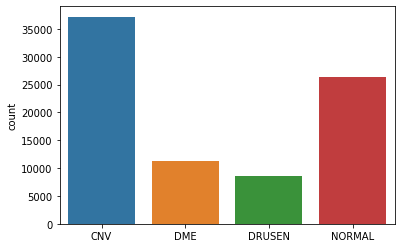

In [27]:
sns.countplot([train.classes[i] for i in train.targets])

In [67]:
train_df = pd.DataFrame(train.imgs, columns=['filename', 'label'])
train_df['label'] = [train.classes[i] for i in train.targets]
train_df['img'] = train_df.filename.apply(os.path.basename)
get_patient = lambda img: img.replace('-',' ').replace('.',' ').split()[1]
train_df['patient'] = train_df.img.apply(get_patient)

test_df = pd.DataFrame(test.imgs, columns=['filename', 'label'])
test_df['label'] = [test.classes[i] for i in test.targets]
test_df['img'] = test_df.filename.apply(os.path.basename)
test_df['patient'] = test_df.img.apply(get_patient)

In [73]:
train_df.head(10)

,filename,label,img,patient
0,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-1016042-1.jpeg,1016042
1,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-1016042-10.jpeg,1016042
2,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-1016042-100.jpeg,1016042
3,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-1016042-101.jpeg,1016042
4,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-1016042-102.jpeg,1016042
5,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-1016042-103.jpeg,1016042
6,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-1016042-104.jpeg,1016042
7,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-1016042-105.jpeg,1016042
8,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-1016042-106.jpeg,1016042
9,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-1016042-107.jpeg,1016042


In [70]:
train_df.patient.value_counts().mean()

18.188235294117646

In [66]:
ProfileReport(train_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [68]:
ProfileReport(test_df)

In [77]:
# Same patient with different diagnoses?
train_df.groupby(['patient', 'label']).size()

patient  label 
1001666  DRUSEN      9
         NORMAL      1
1001772  DRUSEN      2
         NORMAL      8
1004480  NORMAL     14
                  ... 
9992052  NORMAL      2
9997417  CNV        10
9997680  CNV       274
         DME        20
         NORMAL      6
Length: 5620, dtype: int64

In [89]:
train_df[train_df.patient == '9997680']

,filename,label,img,patient
36931,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-9997680-1.jpeg,9997680
36932,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-9997680-10.jpeg,9997680
36933,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-9997680-100.jpeg,9997680
36934,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-9997680-101.jpeg,9997680
36935,/Users/valik/Research/oct_diagn_semi_supervise...,CNV,CNV-9997680-102.jpeg,9997680
...,...,...,...,...
83479,/Users/valik/Research/oct_diagn_semi_supervise...,NORMAL,NORMAL-9997680-2.jpeg,9997680
83480,/Users/valik/Research/oct_diagn_semi_supervise...,NORMAL,NORMAL-9997680-3.jpeg,9997680
83481,/Users/valik/Research/oct_diagn_semi_supervise...,NORMAL,NORMAL-9997680-4.jpeg,9997680
83482,/Users/valik/Research/oct_diagn_semi_supervise...,NORMAL,NORMAL-9997680-5.jpeg,9997680


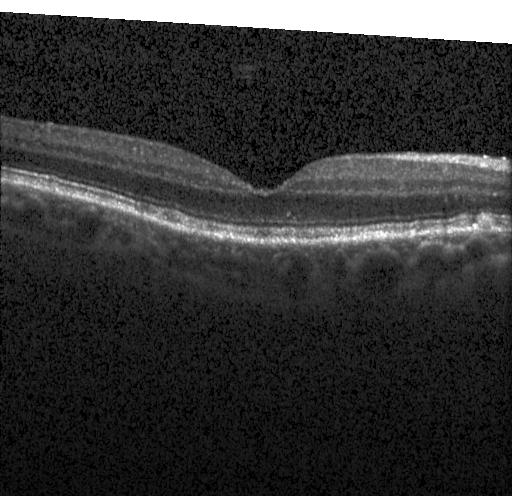

In [88]:
train[48553][0]

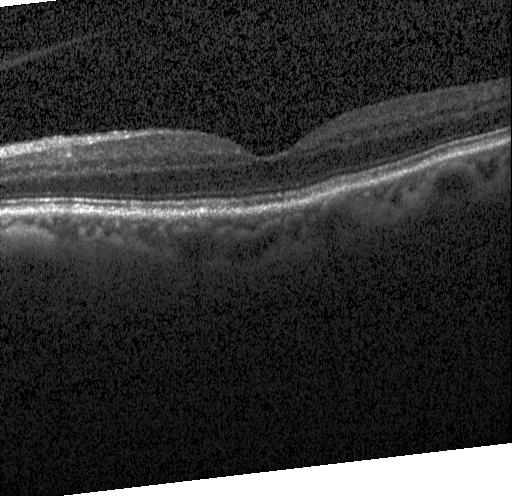

In [84]:
train[57169][0]